# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

Can your team:
- Predict which recipes will lead to high traffic?
- Correctly predict high traffic recipes 80% of the time?
- Whatever your results, what do you recommend we do next?

In [1]:
# Start coding here...

import pandas as pd

df = pd.read_csv("recipe_site_traffic_2212.csv")

# 1. Data Validation

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [3]:
print(df.describe())

           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000


In [4]:
pd.set_option("display.max_columns", None)
print(df.head(10))

   recipe  calories  carbohydrate  sugar  protein        category servings  \
0       1       NaN           NaN    NaN      NaN            Pork        6   
1       2     35.48         38.56   0.66     0.92          Potato        4   
2       3    914.28         42.68   3.09     2.88       Breakfast        1   
3       4     97.03         30.56  38.63     0.02       Beverages        4   
4       5     27.05          1.85   0.80     0.53       Beverages        4   
5       6    691.15          3.46   1.65    53.93   One Dish Meal        2   
6       7    183.94         47.95   9.75    46.71  Chicken Breast        4   
7       8    299.14          3.17   0.40    32.40    Lunch/Snacks        4   
8       9    538.52          3.78   3.37     3.79            Pork        6   
9      10    248.28         48.54   3.99   113.85         Chicken        2   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
5         High  
6          NaN  
7    

In [5]:
df.shape

(947, 8)

In [6]:
df.duplicated(subset='recipe').sum()

0

We are given a dataset containing variables such as recipe, calories, carbohydrate, sugar, protein, category, servings, and high_traffic. It includes 947 recipes, with no duplicates observed. We can observe some inappropriate data types and missing values in certain variables.


### 1.1 Servings

In [7]:
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [8]:
# replacing the rows including "as a snack" with their relevant numeric number
df['servings'] = df['servings'].str.replace(" as a snack", "")

# checking the values of servings column again
df['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [9]:
# converting data type of servings column to integer
df['servings'] = df['servings'].astype('int')

Looking at the original values in the "servings" column, it’s clear they were loaded as strings, since we see entries like "4 as a snack" and "6 as a snack". Since this column is supposed to be numeric (integer), as per the product manager’s instructions, I’ll first map "4 as a snack" to "4" and "6 as a snack" to "6". Then I’ll convert all the values to proper integers.

### 1.2 high_traffic

In [10]:
# checking the values of high_traffic column
df['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

In [11]:
df["high_traffic"] = df["high_traffic"].fillna(0)
df["high_traffic"] = df["high_traffic"].replace("High", 1)
df["high_traffic"] = df["high_traffic"].astype(int)
print("Unique values of high_traffic variable: ", df["high_traffic"].unique())

Unique values of high_traffic variable:  [1 0]


### 1.3 Category

The category column, currently of type object, should be reviewed to identify any rows that may need adjustment before converting it to the category type. We'll begin by examining the value distribution to better understand its contents.

In [12]:
# checking the values of category column
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [13]:
df['category'] = df['category'].str.replace(" Breast", "")

# checking the values of servings column again
df['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [14]:
# converting data type of category column to category
df['category'] = df['category'].astype('category')

The category column contains an extra value, 'Chicken Breast', which does not align with the predefined categories such as 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', and 'One Dish Meal'. Since 'Chicken Breast' logically falls under the 'Chicken' category, we will reclassify it accordingly.

In [15]:
# checking the summary of dataframe's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 53.2 KB


### 1.4 Missing values

In [16]:
# checking missing numbers for each columns
df.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [17]:
# Filter rows where 'calories' column has missing values (NaN) and group by 'category' and 'servings'
missing_calories_count = df[df['calories'].isna()].groupby(['category', 'servings'])['recipe'].count()

# Display the count of recipes with missing calories for each category and servings group
print(missing_calories_count)

category       servings
Beverages      1           0
               2           0
               4           0
               6           0
Breakfast      1           0
               2           0
               4           0
               6           0
Chicken        1           1
               2           1
               4           3
               6           4
Dessert        1           1
               2           2
               4           2
               6           1
Lunch/Snacks   1           0
               2           0
               4           5
               6           2
Meat           1           1
               2           2
               4           2
               6           0
One Dish Meal  1           0
               2           1
               4           3
               6           0
Pork           1           1
               2           0
               4           4
               6           6
Potato         1           1
               2   

The columns calories, carbohydrate, sugar, and protein each have 52 missing values. With 947 rows in the dataset, this represents 5.5% of the data—slightly above the commonly accepted 5% threshold for safely removing rows without significantly reducing dataset size.

In [18]:
nutritional = ["calories", "carbohydrate", "sugar", "protein", "servings"]

for name in nutritional:
    df[name] = df[name].fillna(df.groupby(["category", "servings"])[name].transform("median"))

In [20]:
# checking missing numbers for each columns
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 53.2 KB


After completing data validation and cleaning, the DataFrame is now ready for exploratory analysis.

# 2. **Exploratory Analysis**

### 1. Distribution of servings and category

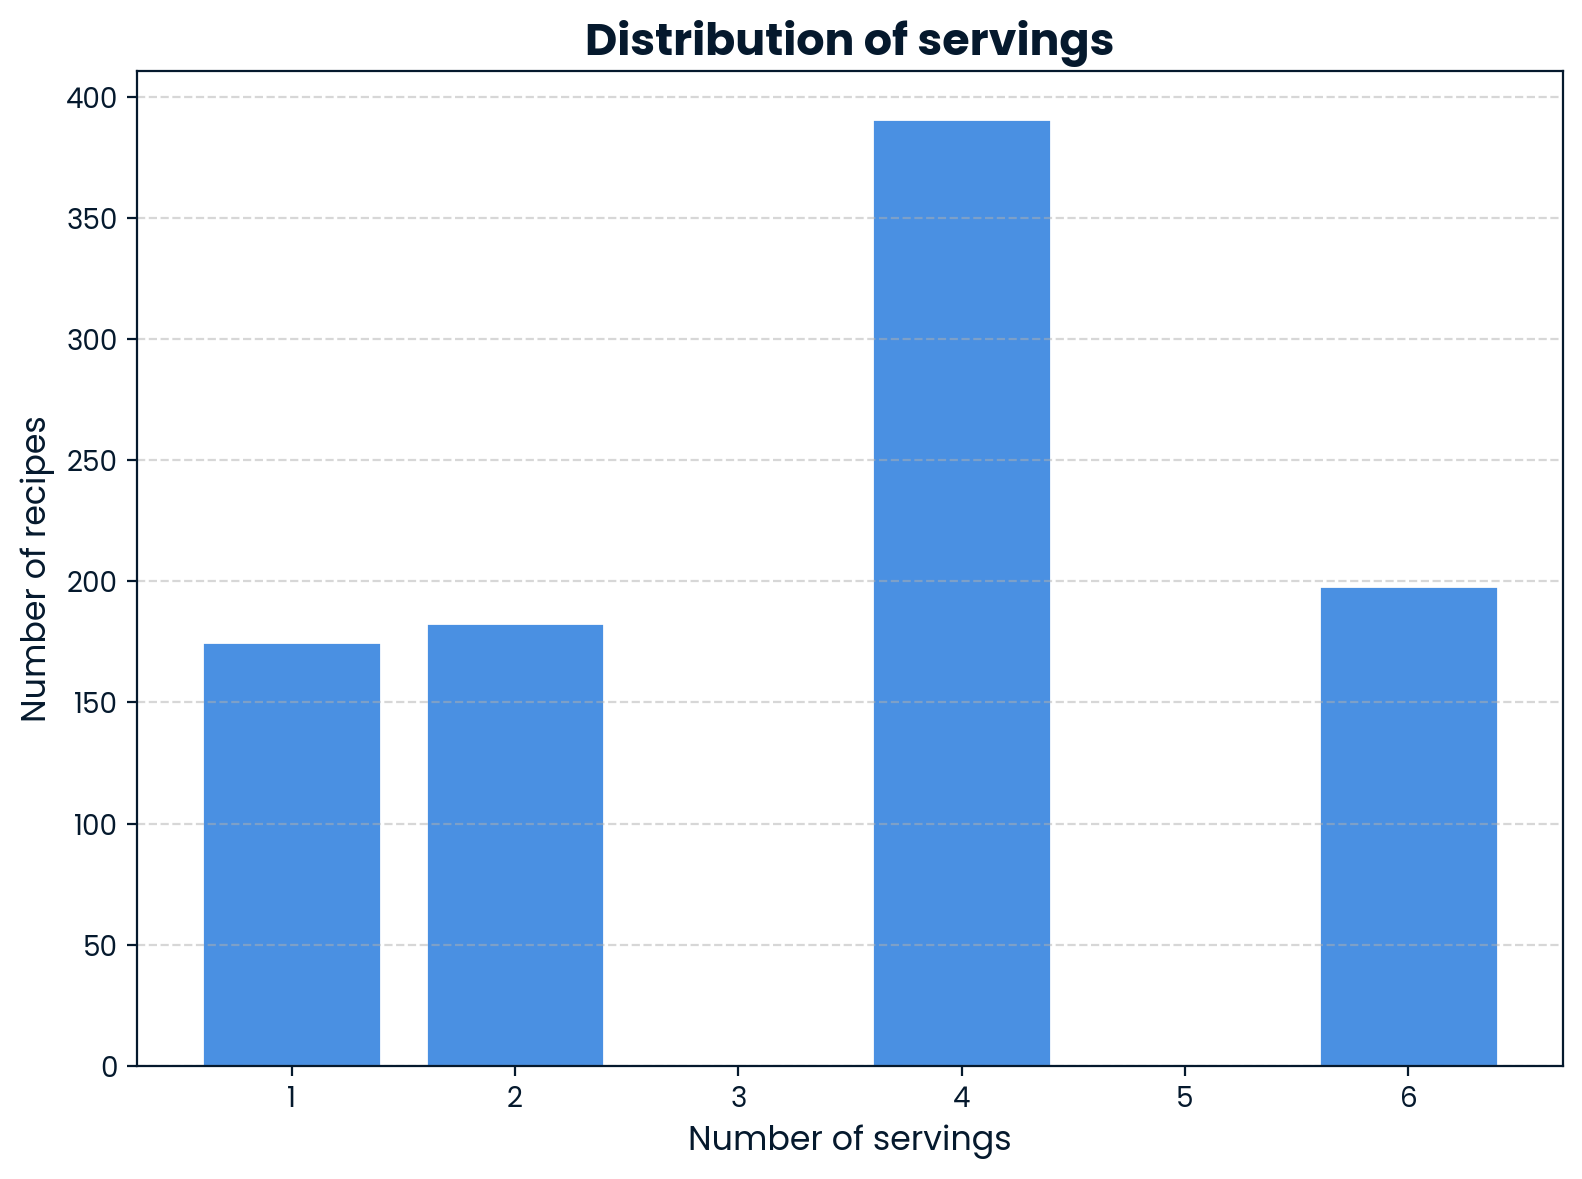

In [22]:
import matplotlib.pyplot as plt

full_range = range(df["servings"].min(), df["servings"].max() + 1)

servings_counts = df["servings"].value_counts().reindex(full_range, fill_value=0)

plt.figure(figsize=(8, 6))
plt.bar(servings_counts.index, servings_counts.values, color="#4A90E2", edgecolor="white")

plt.title("Distribution of servings", fontsize=16, weight="bold")
plt.xlabel("Number of servings", fontsize=12)
plt.ylabel("Number of recipes", fontsize=12)
plt.xticks(list(full_range), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

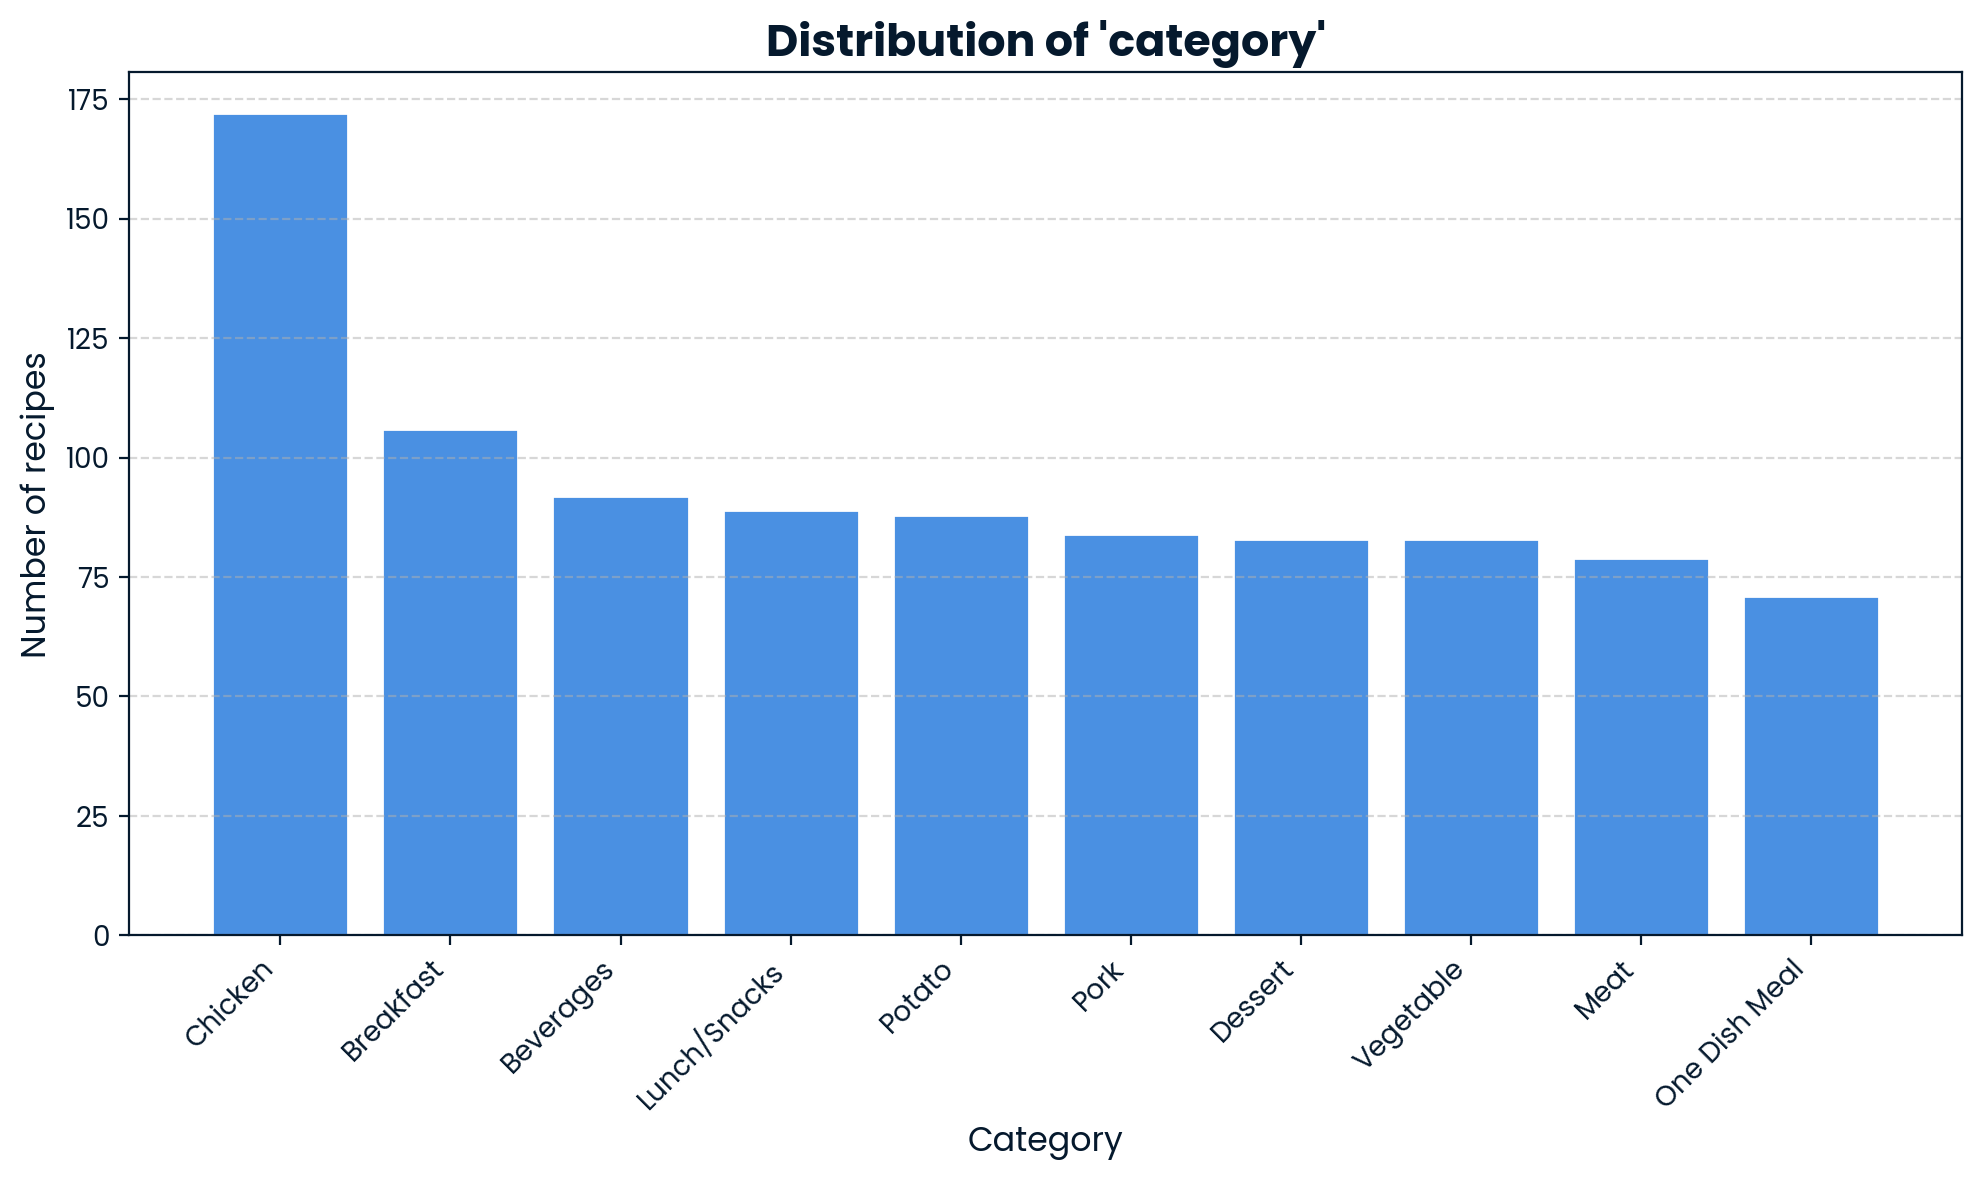

In [23]:
category_counts = df["category"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color="#4A90E2", edgecolor="white")

plt.title("Distribution of 'category'", fontsize=16, weight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of recipes", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 2. Correlation Heatmap of Nutritional Variables and Boxplot

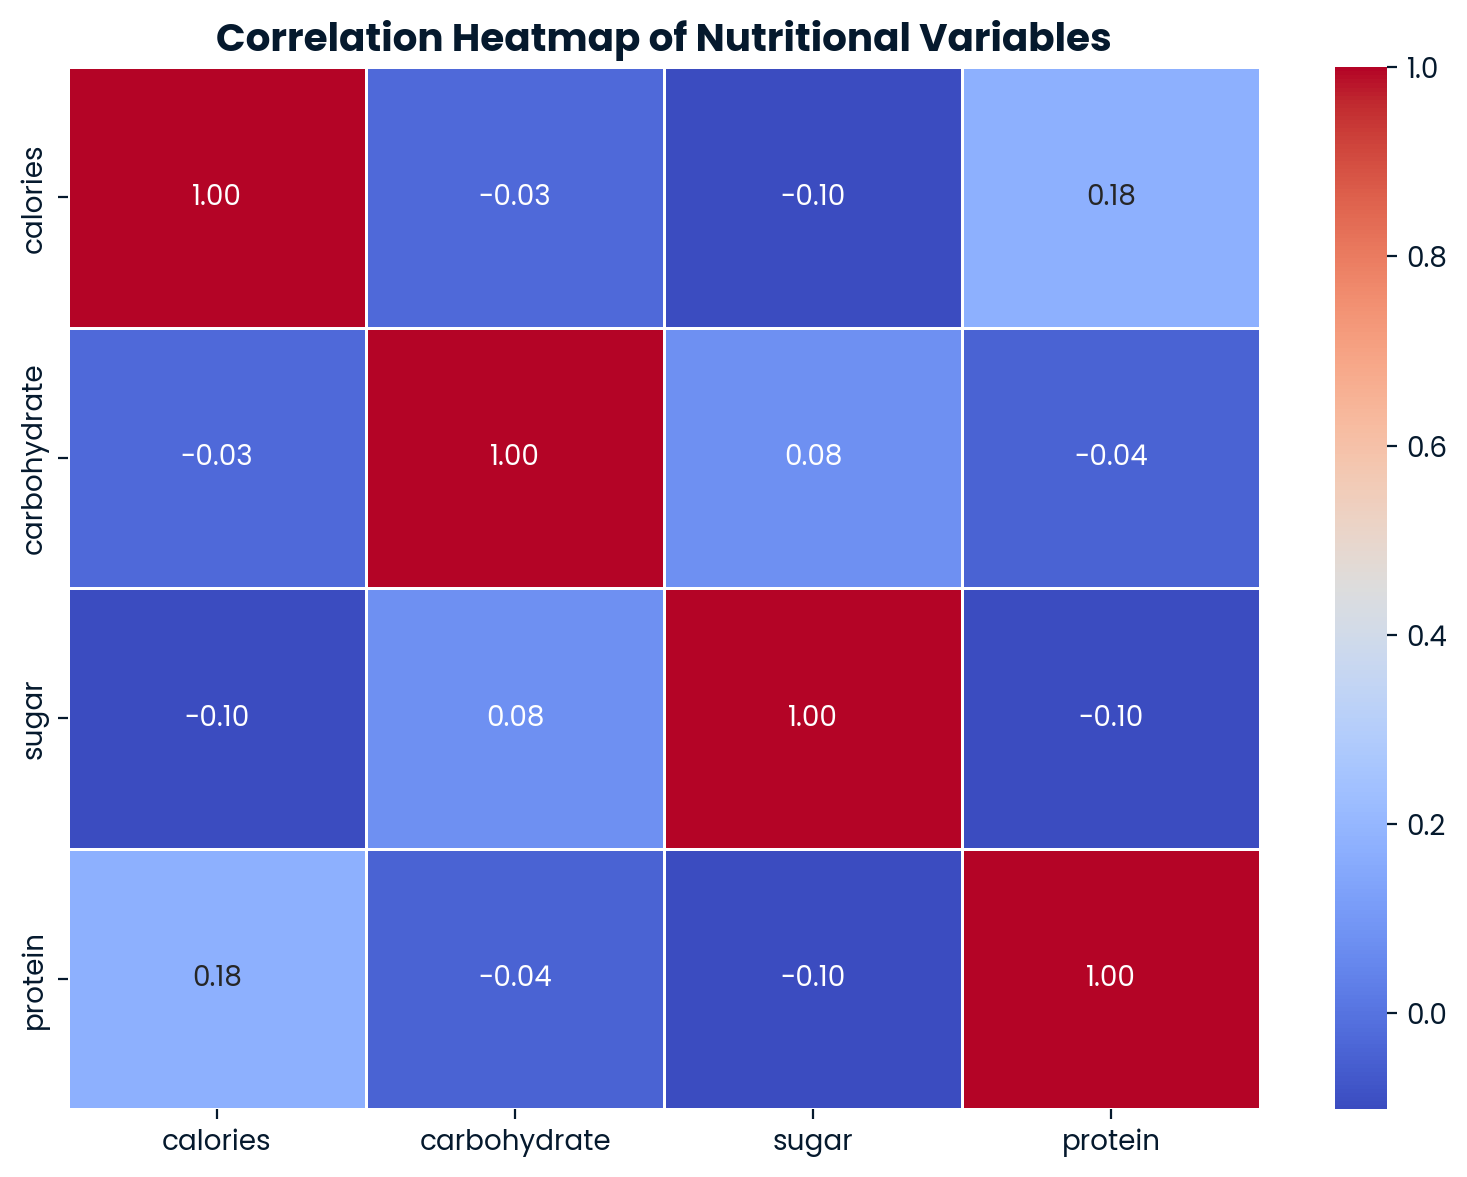

In [24]:
import seaborn as sns

selected_vars = ["calories", "carbohydrate", "sugar", "protein"]

corr = df[selected_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Variables", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

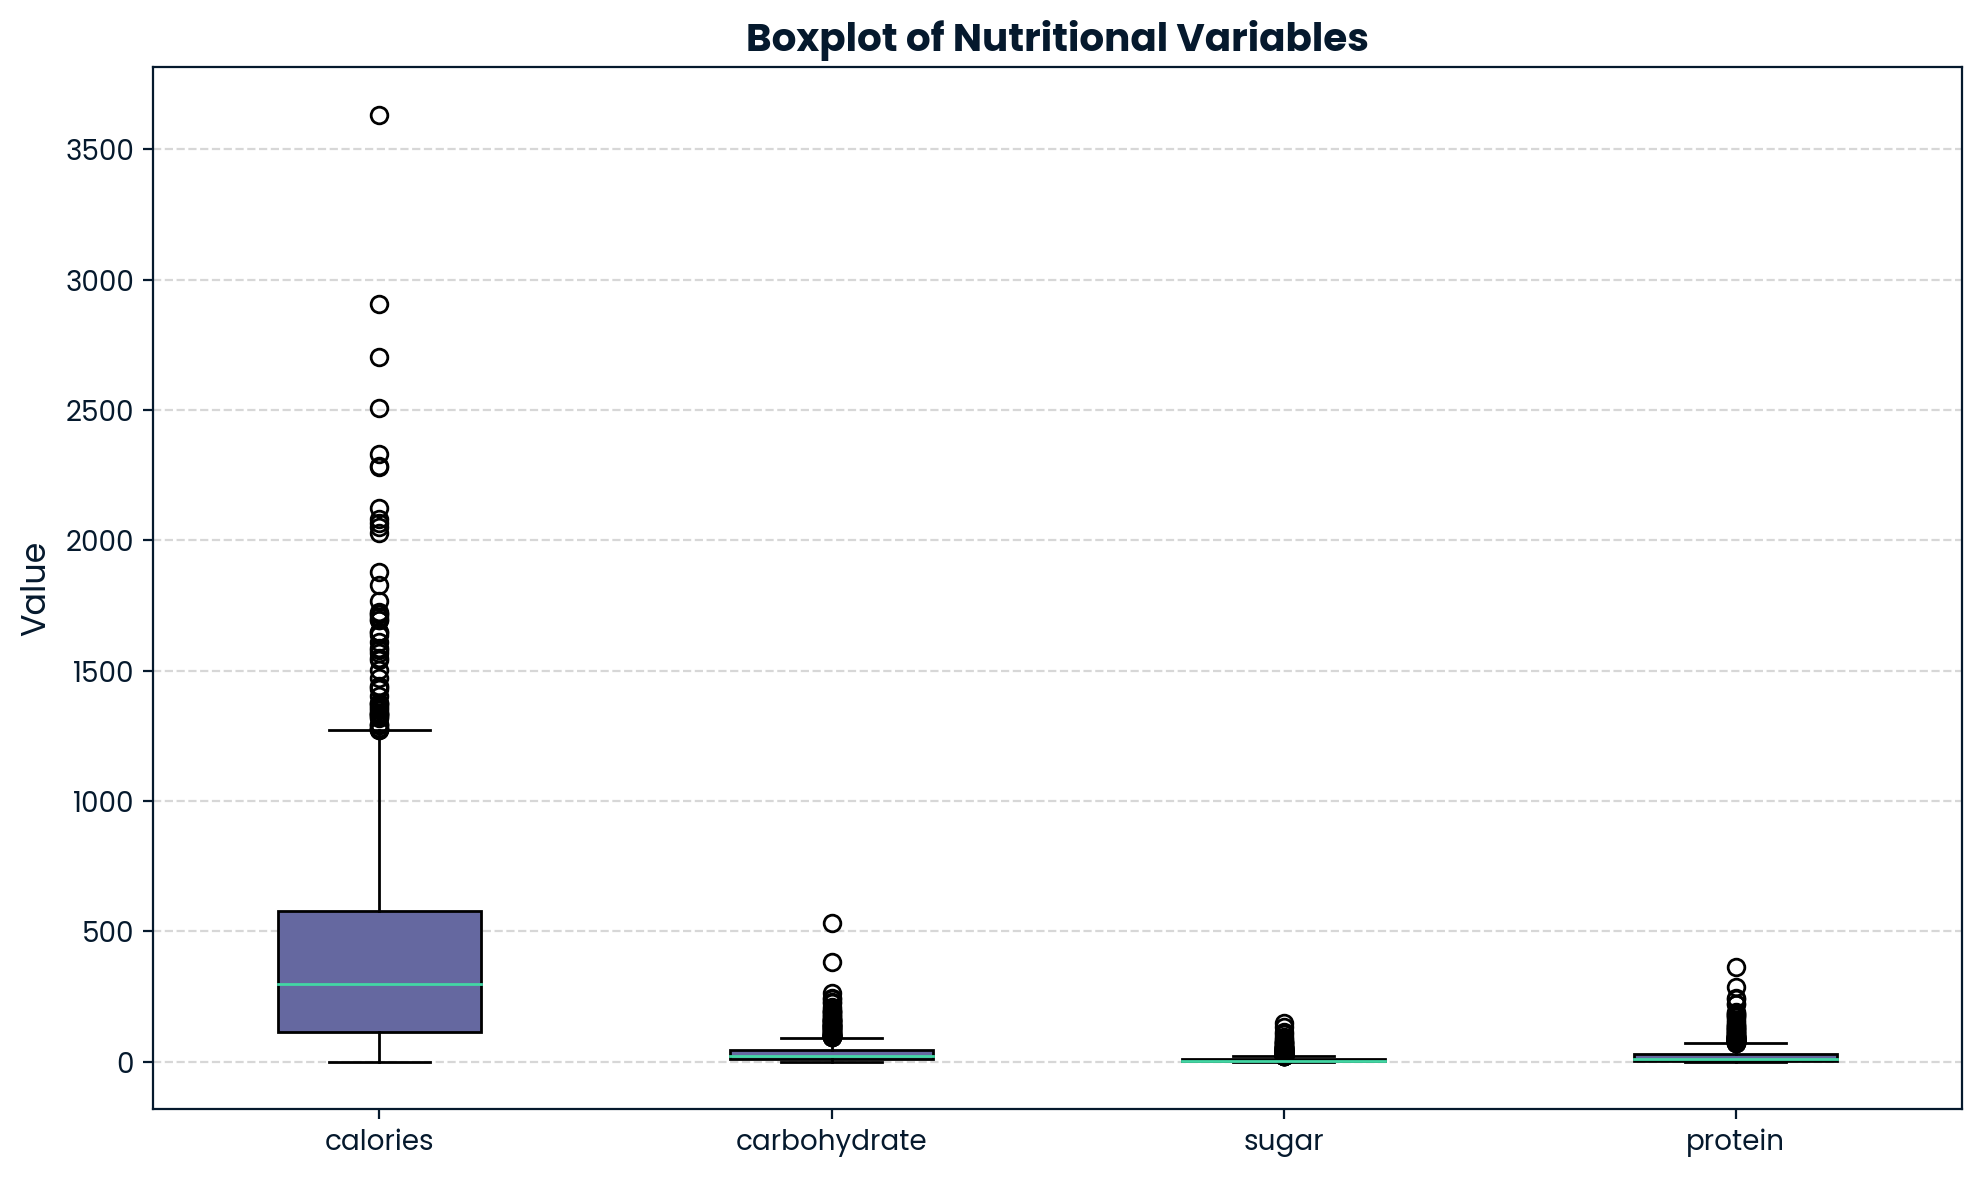

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[col] for col in selected_vars], labels=selected_vars, patch_artist=True)

plt.title("Boxplot of Nutritional Variables", fontsize=14, weight="bold")
plt.ylabel("Value", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Pairwise Relationships Between Calories, Carbohydrates, Sugar, and Protein, Colored by High Traffic

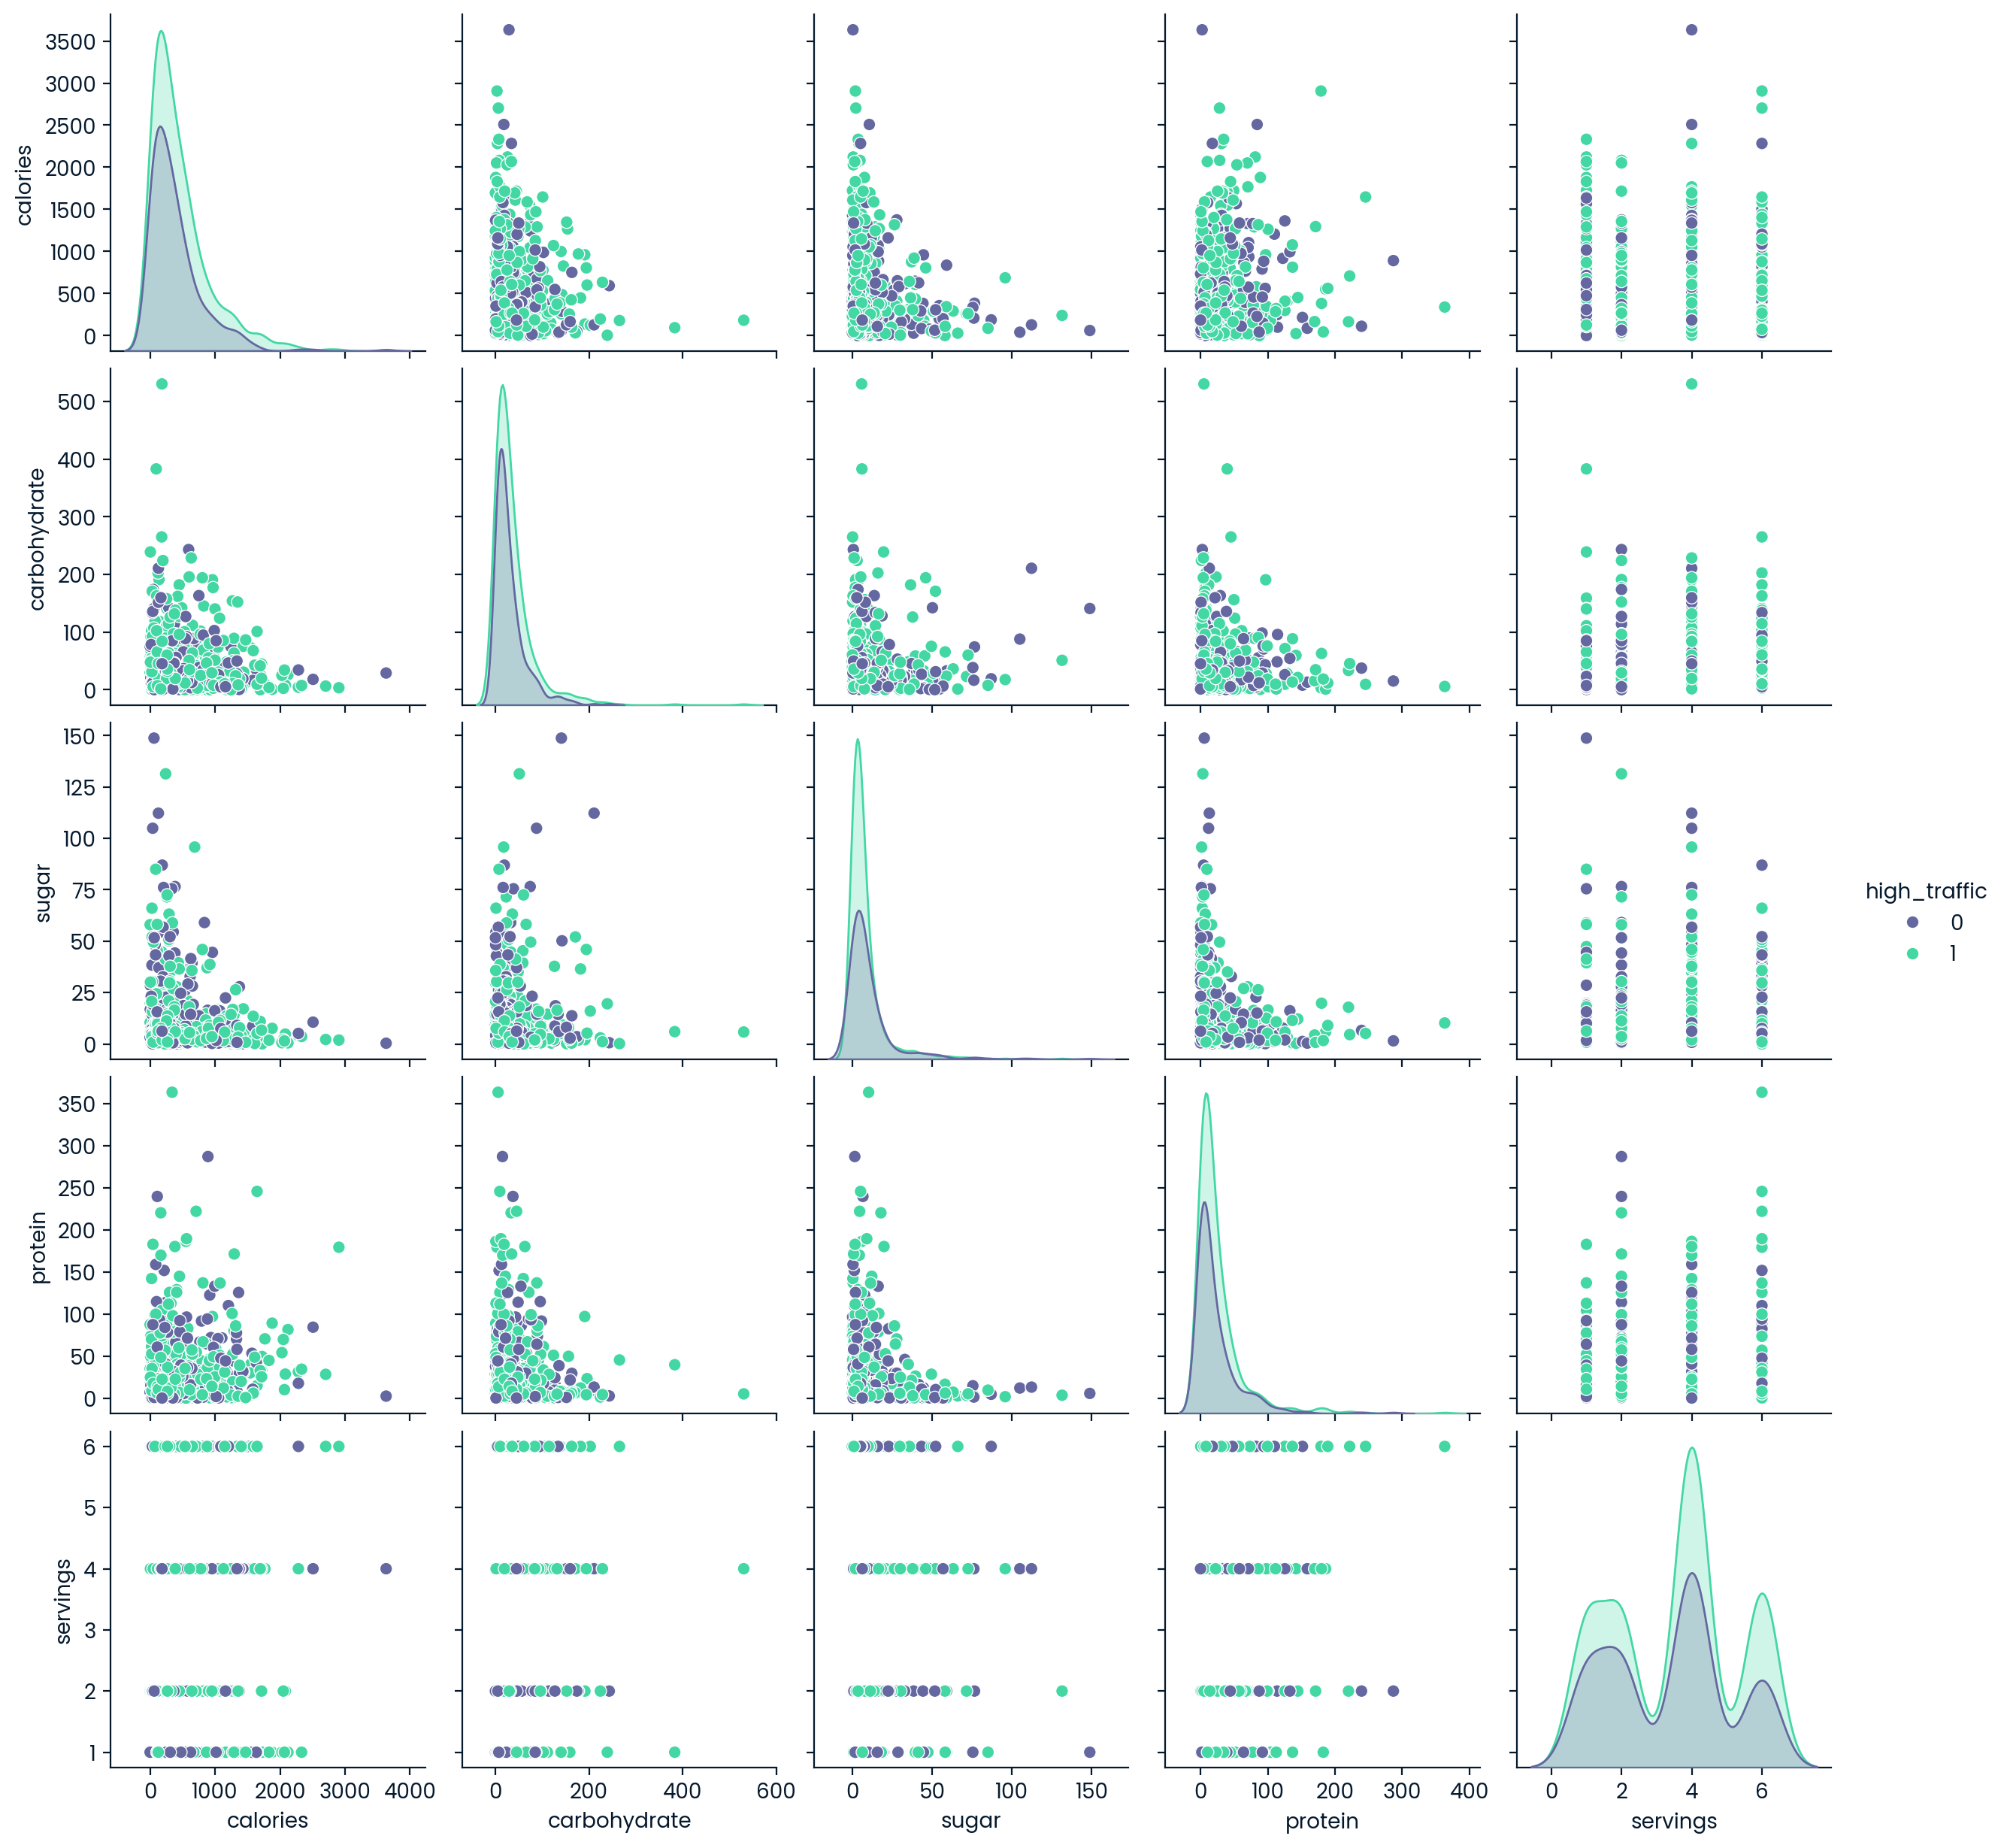

In [26]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(df[filtered_columns], hue='high_traffic')
plt.show()


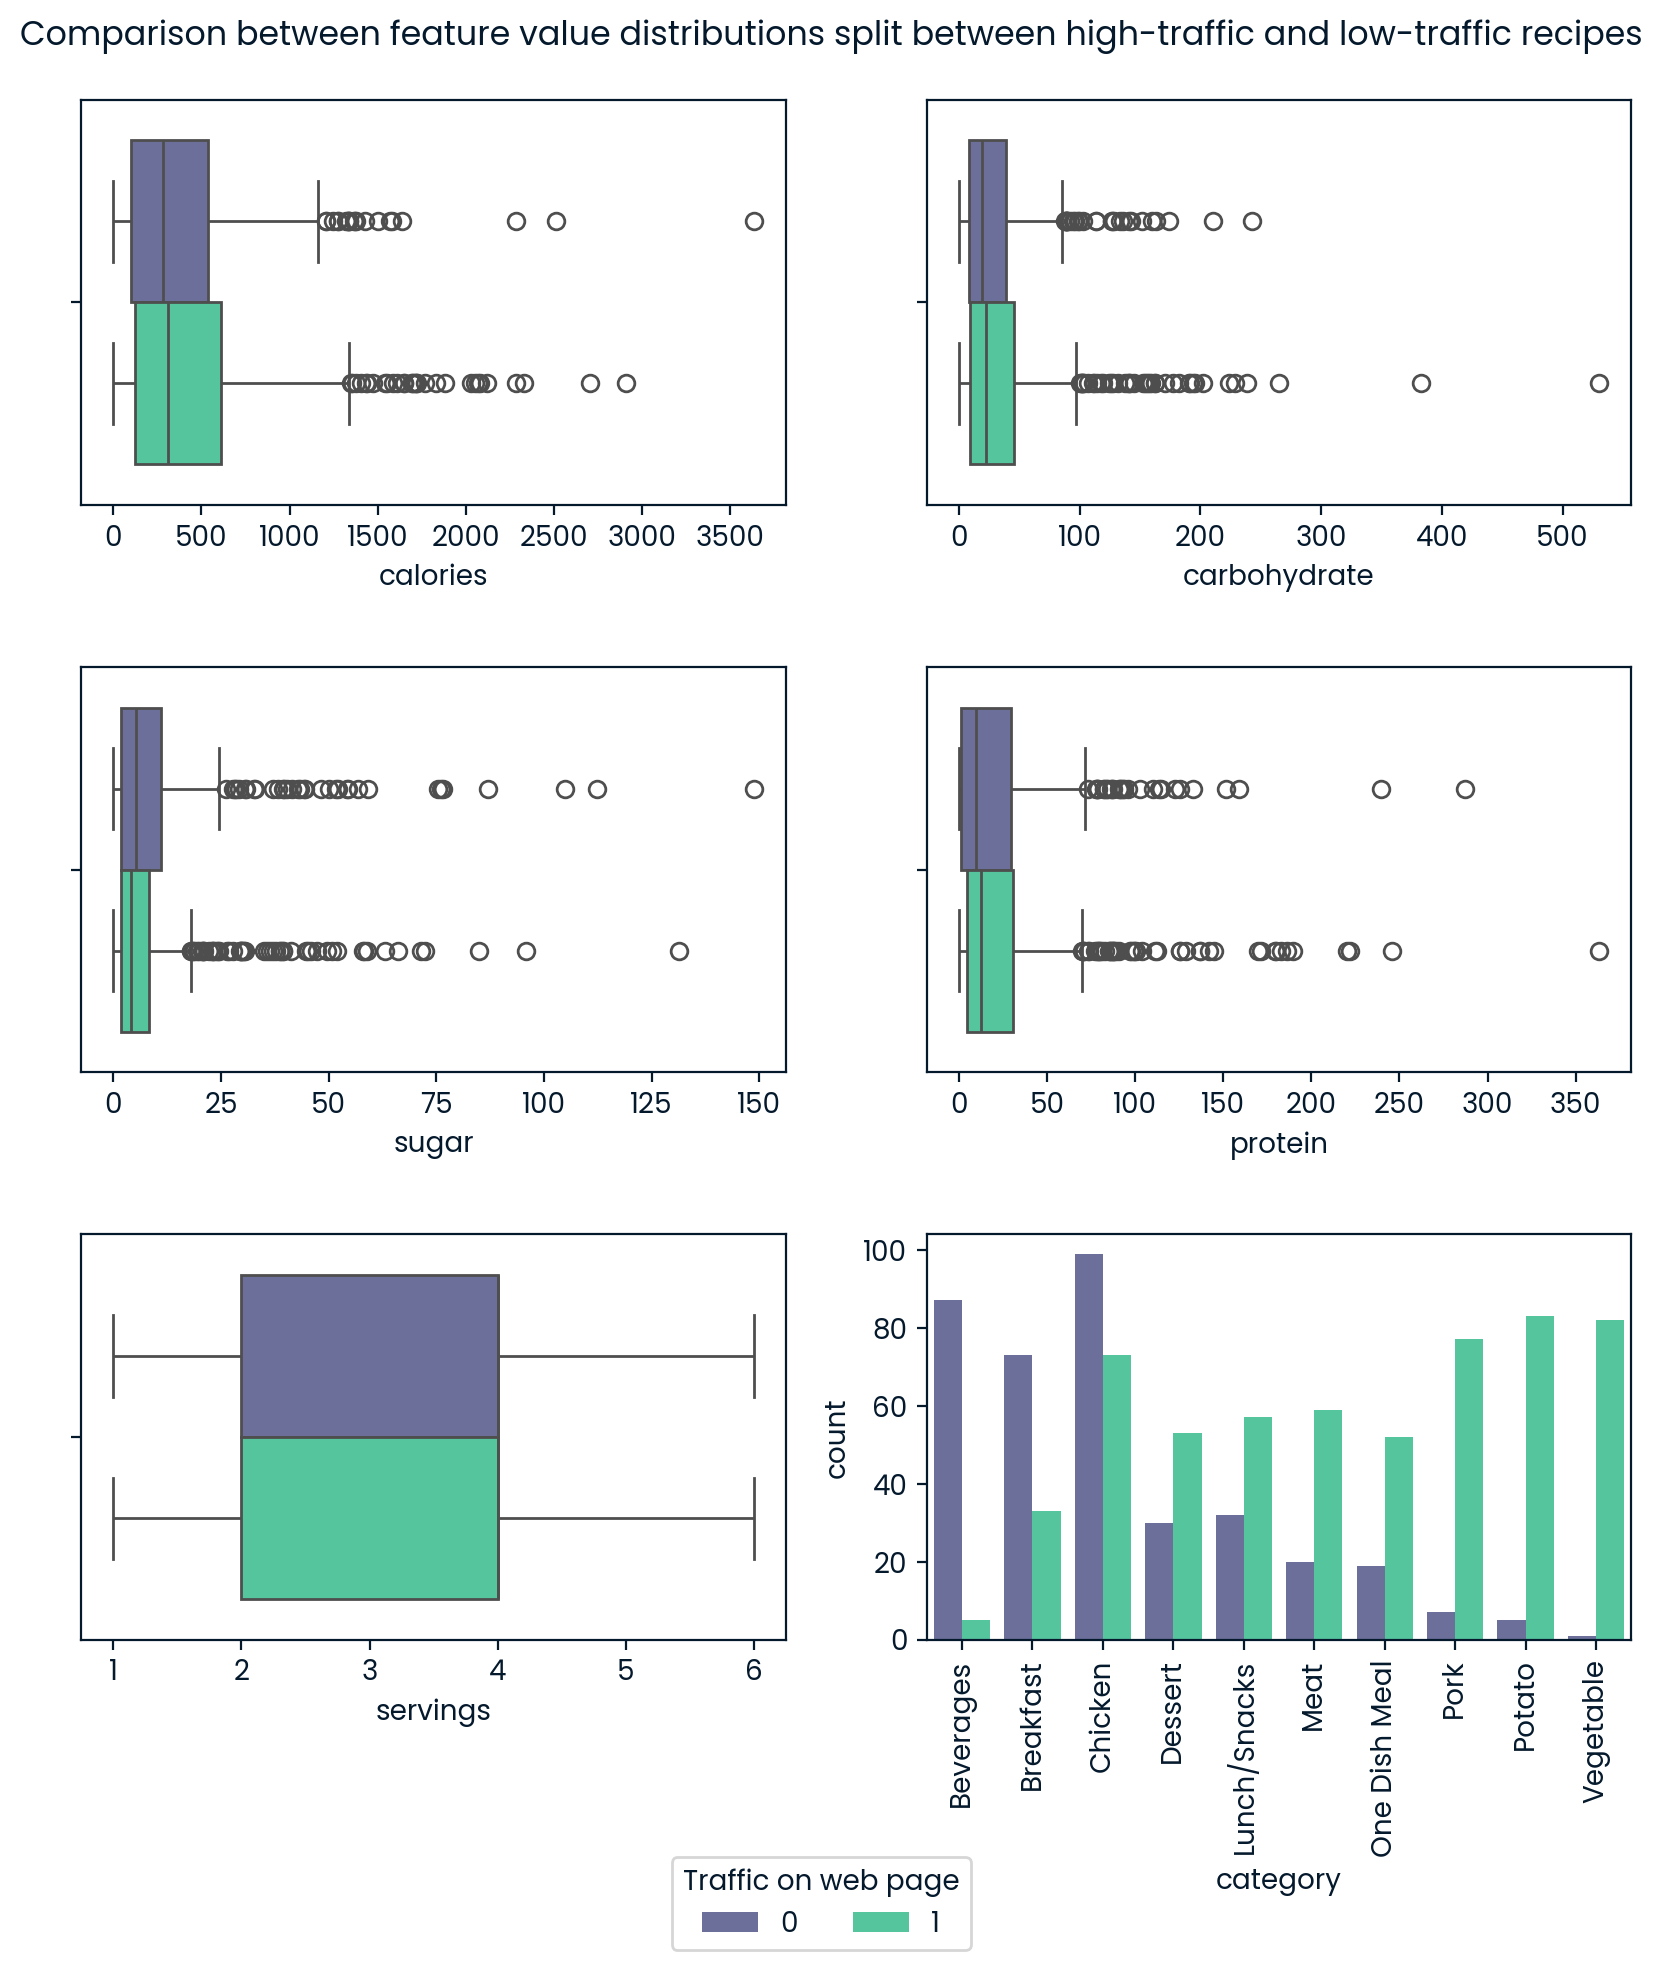

In [27]:
# Box plots for each feature variable split by high- and low-traffic recipes
fig, axs = plt.subplots(3,2, figsize=(10,10), gridspec_kw={"hspace":0.4})
sns.boxplot(data=df, x="calories", hue="high_traffic", ax=axs[0,0], legend=False)
sns.boxplot(data=df, x="carbohydrate", hue="high_traffic", ax=axs[0,1], legend=False)
sns.boxplot(data=df, x="sugar", hue="high_traffic", ax=axs[1,0], legend=False)
sns.boxplot(data=df, x="protein", hue="high_traffic", ax=axs[1,1], legend=False)
sns.boxplot(data=df, x="servings", hue="high_traffic", ax=axs[2,0], legend=False)
sns.countplot(data=df.sort_values("category"), x="category", hue="high_traffic", ax=axs[2,1])
axs[2,1].set_xticklabels(df.sort_values("category")["category"].unique(), rotation=90)
axs[2,1].legend(loc="lower center", bbox_to_anchor=(-0.15,-0.8), ncol=2, title="Traffic on web page")
fig.suptitle("Comparison between feature value distributions split between high-traffic and low-traffic recipes", y=0.92)
plt.show()


### **5. Describing my findings**

**1. Distribution of Servings**
- Most common serving size is clearly 4 servings, with over 350 recipes.
- Servings like 3 and 5 are nonexistent in this dataset.
- There’s a balanced presence of 1, 2, and 6 servings, but much lower than 4.
  
_4-serving recipes dominate and may bias results._


**2. Distribution of 'category'**
The top 3 categories are:
- Chicken
- Breakfast
- Beverages
  
Less common categories include Pork, Chicken, and One Dish Meal
_Some categories are heavily overrepresented, which could affect classification tasks or clustering. We could onsider rebalancing or grouping._


3. Correlation Heatmap (Nutritional Variables)
Most correlations are weak:
- Calories vs Protein: 0.18 → weak positive
- Sugar vs Calories: -0.10 → weak negative
  
Other pairs are very close to zero (almost no linear relationship).
_No strong multicollinearity. Variables like calories, sugar, protein, and carbs provide mostly independent information — good for modeling_



4. Boxplot Findings (Nutritional Variables)
- **Calories** has the widest spread and the most outliers — highly skewed, with some extreme values.
- **Carbohydrate**, **sugar**, and **protein** have tighter distributions, but still show some outliers.
- We can consider scaling or transforming features (especially calories) before modeling.

5. The overall patterns stay the same. The distributions of calories, carbs, sugar, and protein are still pretty similar between recipes with high and low traffic. It confirms again that the number of servings doesn’t really affect whether a recipe gets more attention or not. There’s still no strong visual separation between the two traffic groups based on these nutritional features alone.



6. From these plots, we can see that the amount of calories and macros is pretty similar in both low- and high-traffic recipes. The number of servings doesn’t really affect traffic at all, which makes sense—people can just adjust that themselves. One more thing: drinks usually get low traffic, while recipes with pork, potatoes, or veggies tend to bring in more traffic.

# **3. Model Development**

The problem addressed in this project is a binary classification problem, as the target variable 'high_traffic' is binary (0 or 1).

I use an Artificial Neural Network (ANN) as a baseline model because it is capable of capturing complex non-linear relationships between features.

Additionally, I selected an XGBoost model for comparison, as it is a powerful ensemble method.

## 3A. ANN model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Features and target
features = ["calories", "carbohydrate", "sugar", "protein", "servings"]
X = df[features]
y = df["high_traffic"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

2025-05-08 10:10:16.364710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 0.8606 - accuracy: 0.4033 - val_loss: 0.7790 - val_accuracy: 0.3421
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.7635 - accuracy: 0.4281 - val_loss: 0.7109 - val_accuracy: 0.5132
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.5273 - val_loss: 0.6812 - val_accuracy: 0.5329
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5702 - val_loss: 0.6684 - val_accuracy: 0.6184
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5983 - val_loss: 0.6666 - val_accuracy: 0.6447
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.6083 - val_loss: 0.6709 - val_accuracy: 0.6382
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6050 - val_loss: 0.6727 - val_accuracy: 0.6382
Epoch 8/100
3

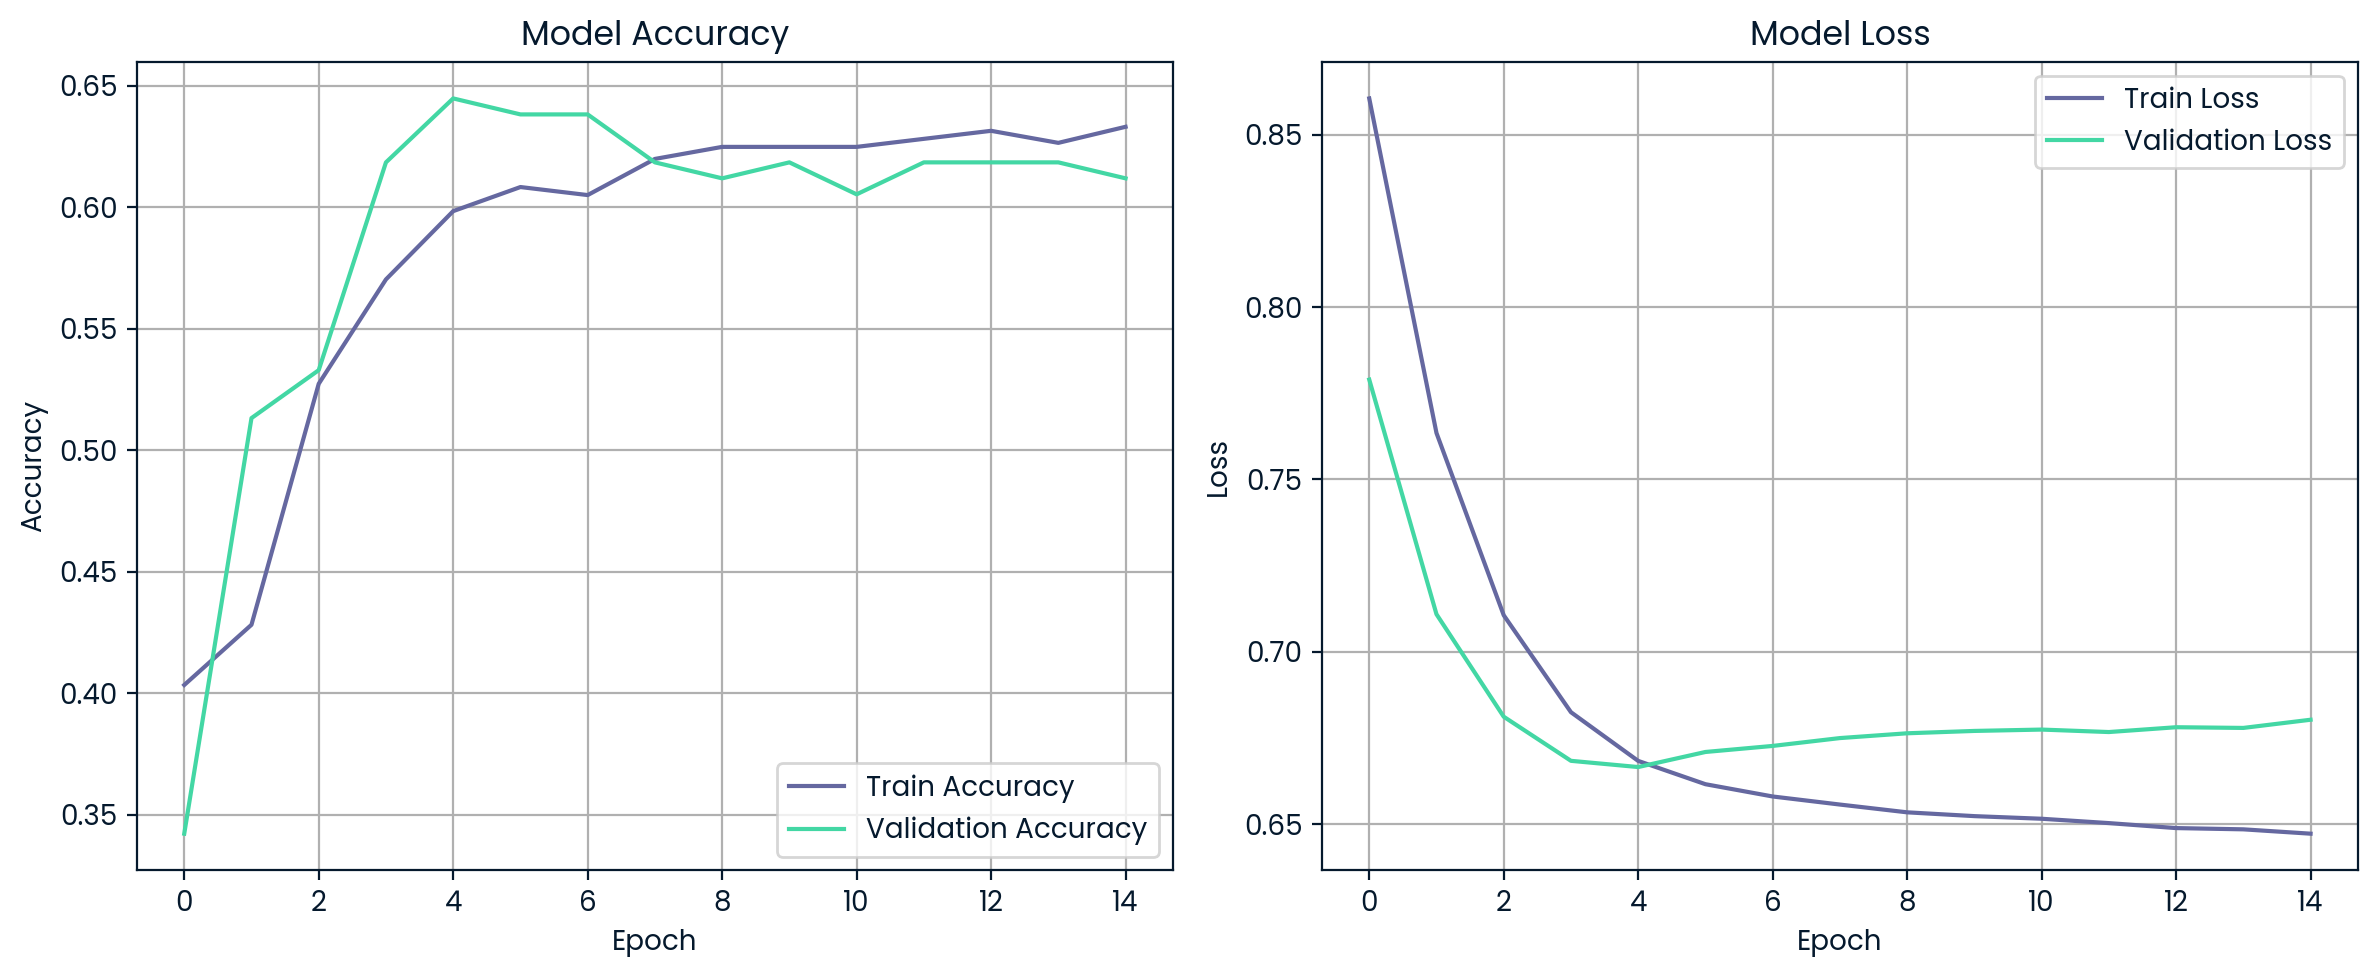

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Since the model did not perform well, I will attempt to develop a more complex model.

## 3B. ANN model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Features and target
features = ["calories", "carbohydrate", "sugar", "protein", "servings"]
X = df[features]
y = df["high_traffic"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Dense(12, activation="relu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 0.8407 - accuracy: 0.5140 - val_loss: 0.6834 - val_accuracy: 0.5592
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7596 - accuracy: 0.5074 - val_loss: 0.6715 - val_accuracy: 0.6118
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.5554 - val_loss: 0.6690 - val_accuracy: 0.6316
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5587 - val_loss: 0.6681 - val_accuracy: 0.6250
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5835 - val_loss: 0.6702 - val_accuracy: 0.6250
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5669 - val_loss: 0.6699 - val_accuracy: 0.6382
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5950 - val_loss: 0.6702 - val_accuracy: 0.6316
Epoch 8/100
3

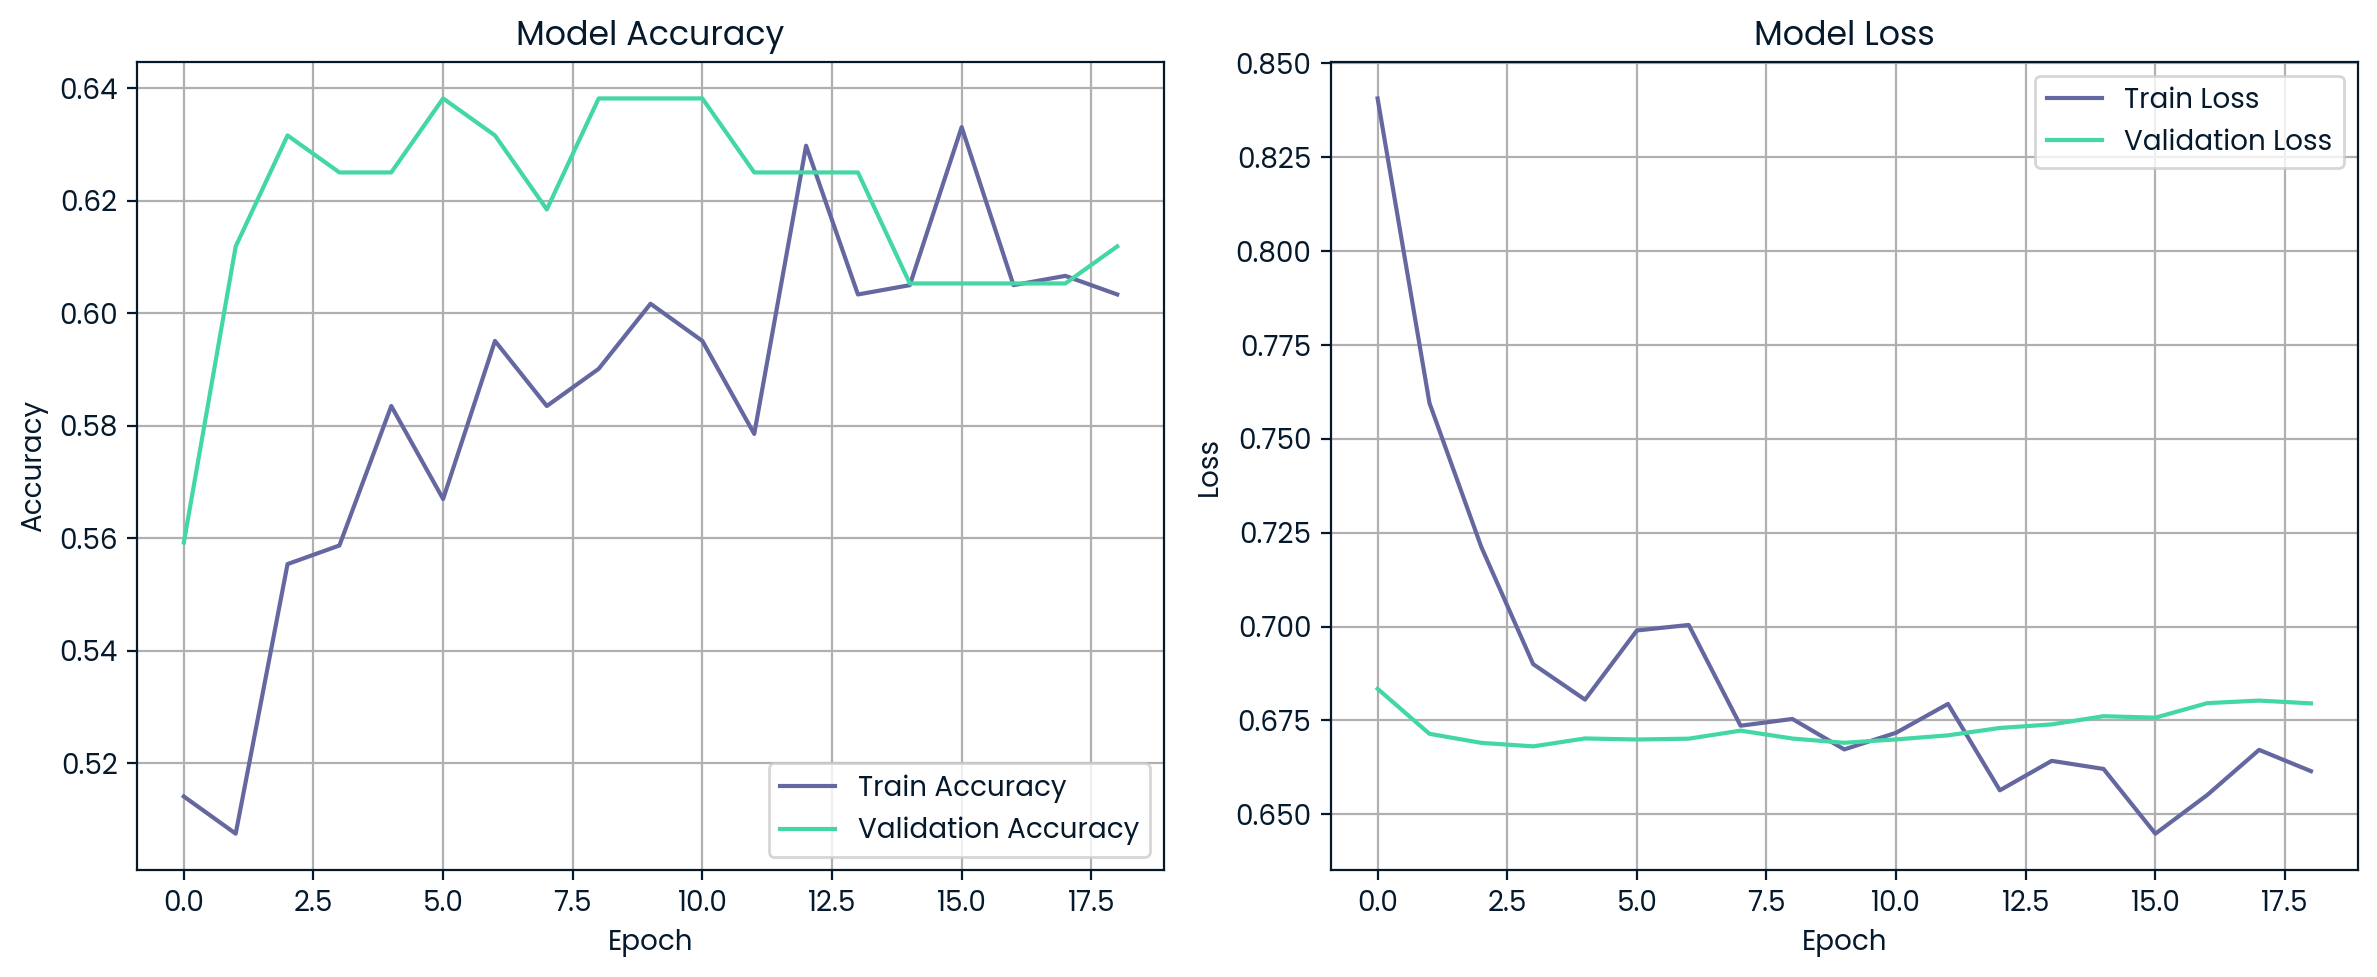

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The model again did not perform well, so I will try a different approach.

Let's go back to the dataset and make some changes to the data.

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


df["protein_per_calorie"] = df["protein"] / (df["calories"] + 1e-5)
df["sugar_per_carb"] = df["sugar"] / (df["carbohydrate"] + 1e-5)
df["sugar_carb_interaction"] = df["sugar"] * df["carbohydrate"]

numerical_features = [
    "calories", "carbohydrate", "sugar", "protein", "servings",
    "protein_per_calorie", "sugar_per_carb", "sugar_carb_interaction"
]
categorical_features = ["category"]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

New features were created:
- protein_per_calorie = protein / (calories + 1e-5)
- sugar_per_carb = sugar / (carbohydrate + 1e-5)
- sugar_carb_interaction = sugar * carbohydrate

Feature groups were defined:
- Numerical features
- Categorical features

Preprocessing steps applied:
- Applied StandardScaler to numerical features
- Applied OneHotEncoder to the category column using ColumnTransformer"

## 3C. ANN model

In [33]:
from imblearn.over_sampling import SMOTE

# Features and target
X = preprocessor.fit_transform(df)
y = df["high_traffic"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Neural network
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train_sm.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005, decay=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

# Train
history = model.fit(
    X_train_sm, y_train_sm,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predict probabilities
y_pred_prob = model.predict(X_test).flatten()

# Metrics for different thresholds
for threshold in [0.4, 0.45, 0.5, 0.55, 0.6]:
    y_pred = (y_pred_prob > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))

Epoch 1/200
23/23 [==============================] - 1s 7ms/step - loss: 0.8150 - accuracy: 0.5886 - val_loss: 0.7894 - val_accuracy: 0.1522
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.6172 - val_loss: 0.8452 - val_accuracy: 0.1033
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6117 - val_loss: 0.8856 - val_accuracy: 0.0761
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.6226 - val_loss: 0.9071 - val_accuracy: 0.0761
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.6158 - val_loss: 0.9194 - val_accuracy: 0.0761
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6253 - val_loss: 0.9177 - val_accuracy: 0.0707
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6458 - val_loss: 0.9054 - val_accuracy: 0.0652
Epoch 8/200
2

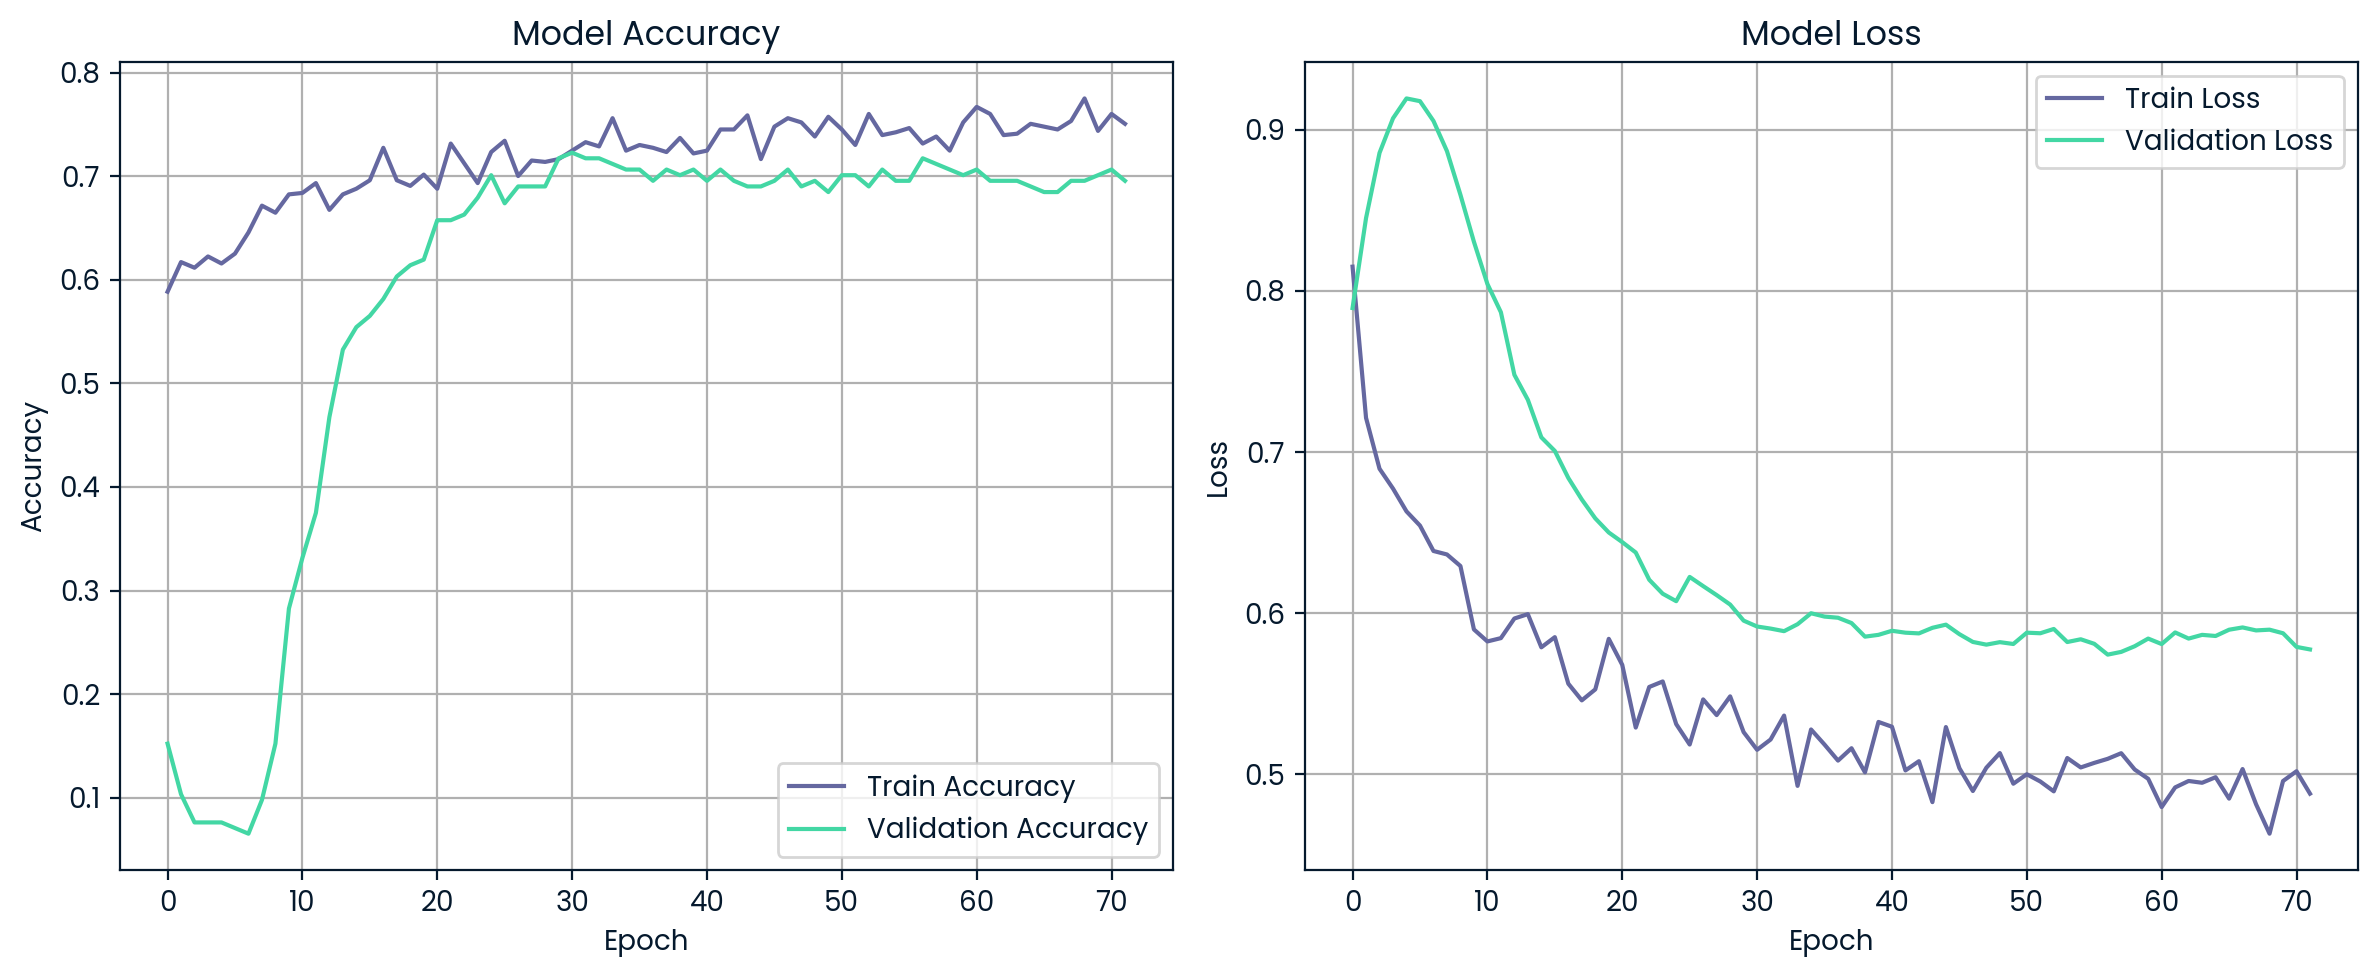

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 3D. XGboost

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Features and target
X = preprocessor.fit_transform(df)
y = df["high_traffic"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initial XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Grid search
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_sm, y_train_sm)

# Best model
best_xgb = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

# Predict probabilities
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate for different thresholds
for threshold in [0.4, 0.45, 0.5, 0.55, 0.6]:
    y_pred = (y_pred_prob > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsamp

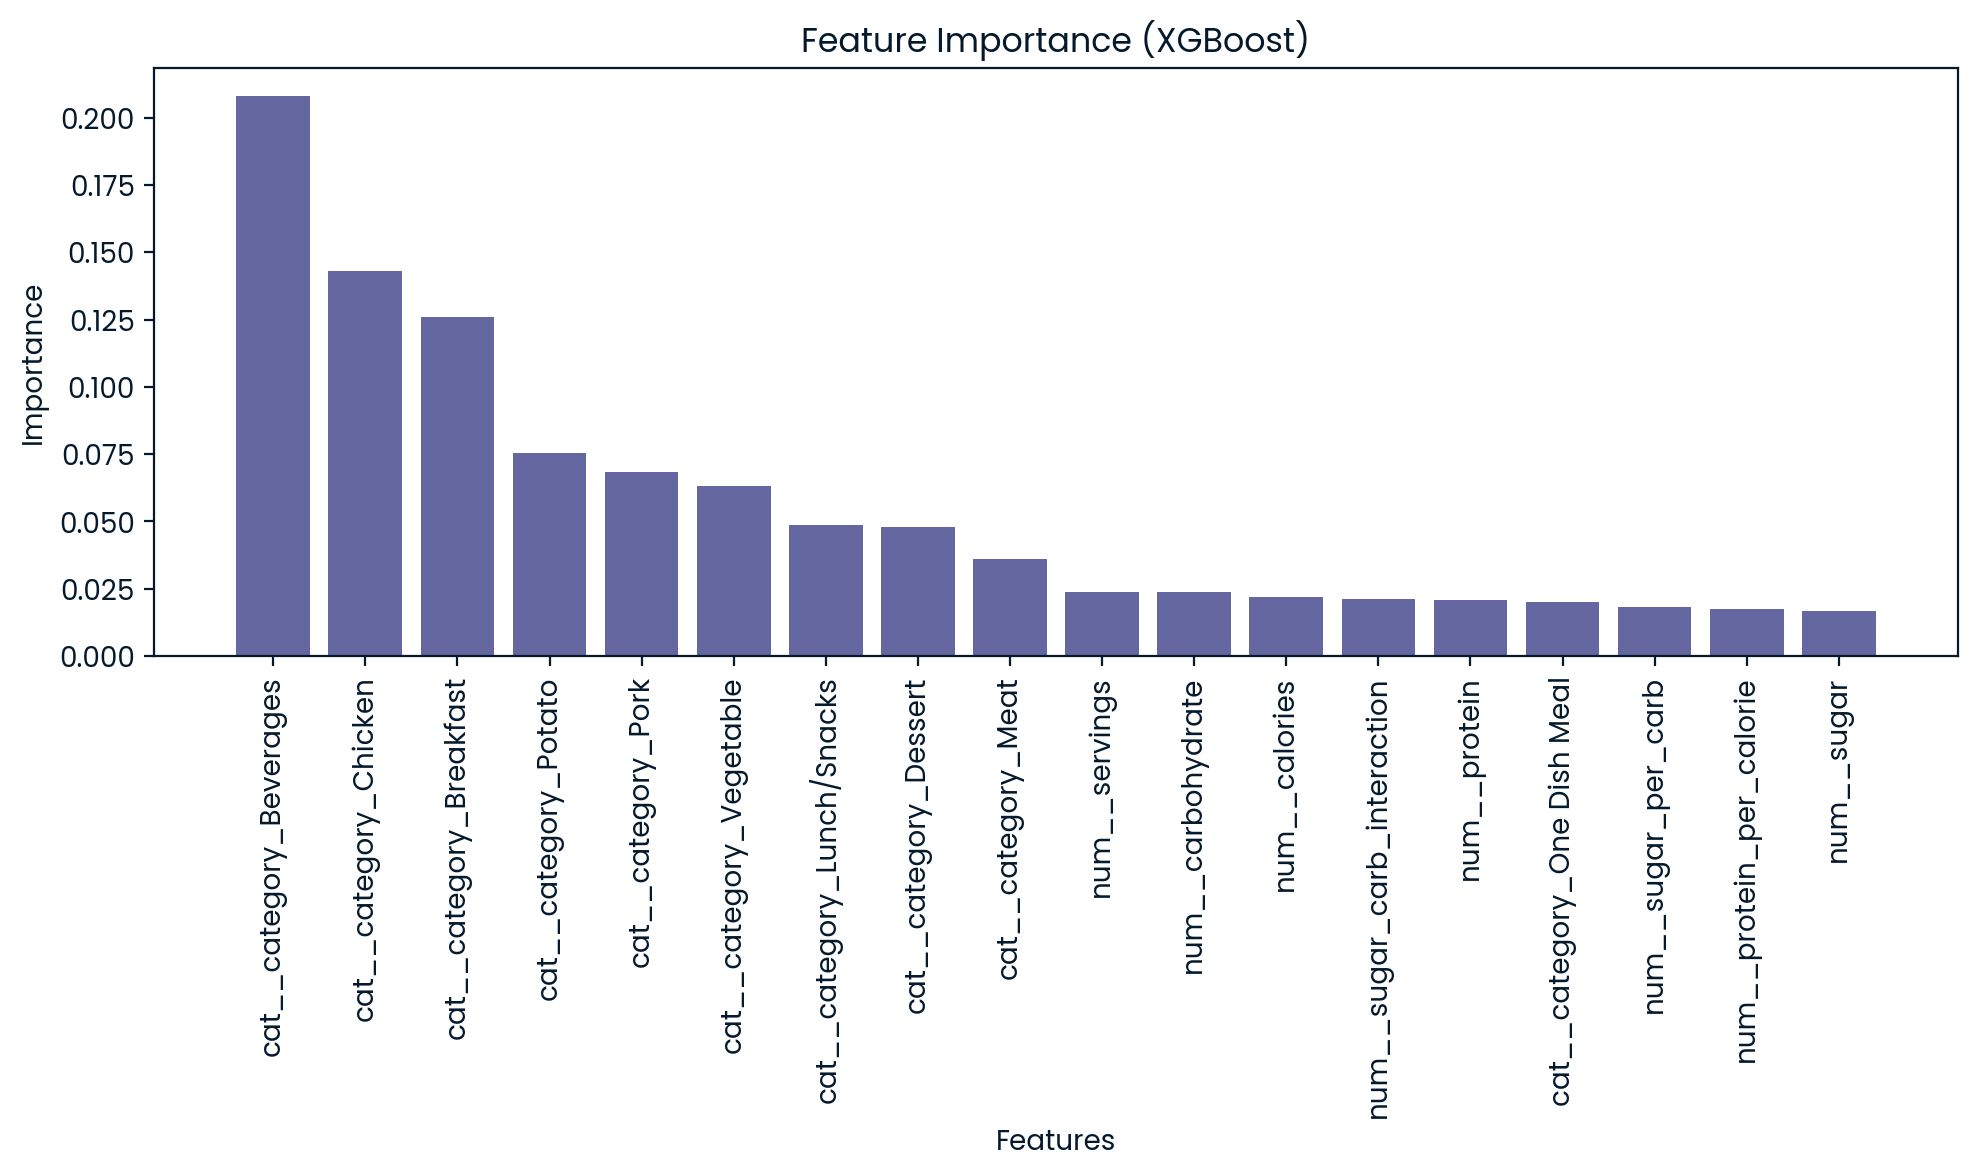

In [41]:
import numpy as np

# Feature importances from the best model
importances = best_xgb.feature_importances_

# Feature names
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

The feature importance analysis revealed that categorical variables, particularly the recipe category, played the most significant role in predicting high website traffic.

Categories such as "Beverages", "Breakfast", and "Chicken" were among the most influential features.

In contrast, numerical nutritional variables like calories, sugar, and protein had a relatively smaller impact on the model's predictions.

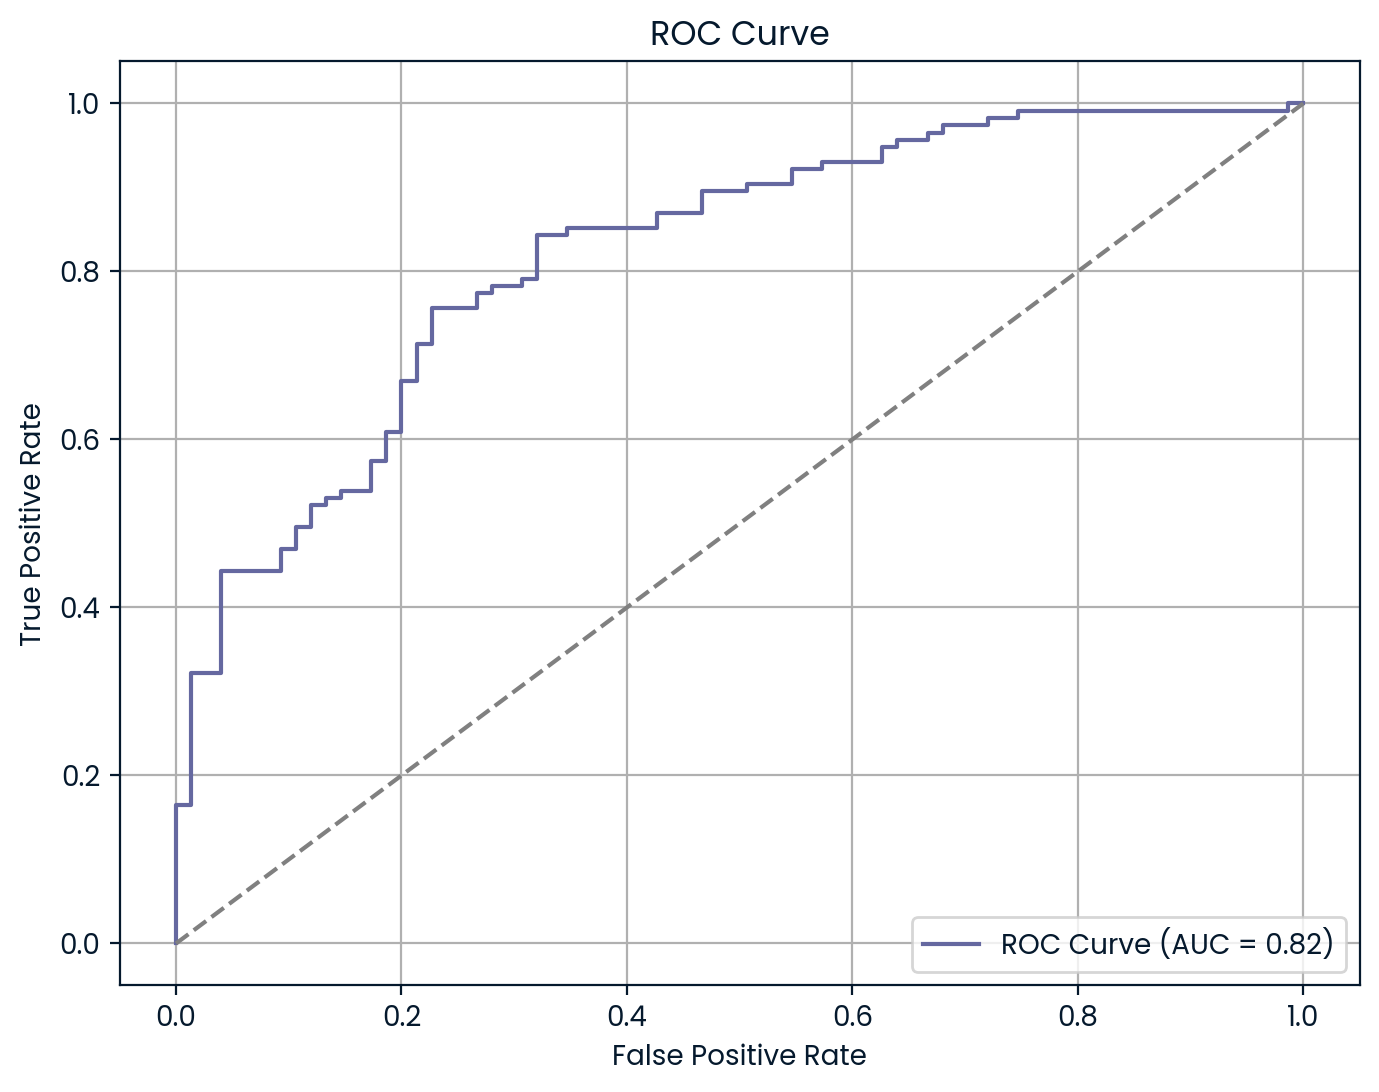

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The ROC curve demonstrates that the model has good discriminative ability, with an AUC score of 0.82.
This indicates that the model is able to distinguish between high-traffic and low-traffic recipes with a high degree of accuracy.

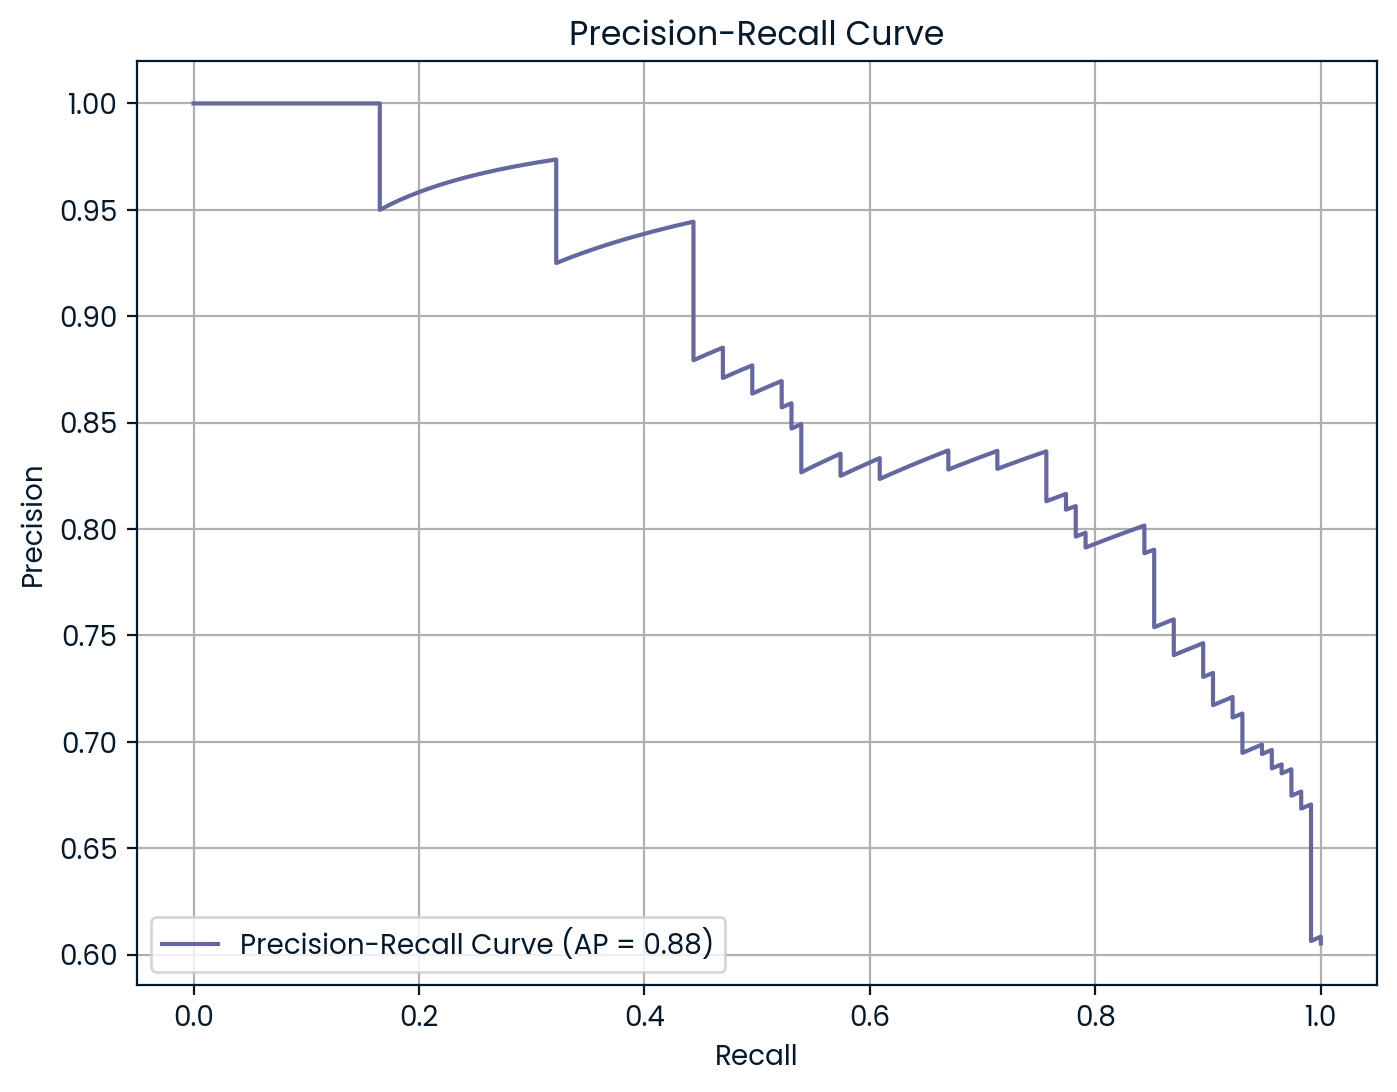

In [43]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()


The Precision-Recall curve shows that the model maintains high precision even at high levels of recall.
The average precision (AP) score of 0.88 indicates a strong ability to correctly identify positive cases while minimizing false positives.

# 4. Model Evaluation

To evaluate the performance of the models, appropriate methods for binary classification were used, including accuracy, precision, recall, F1-score, and the ROC curve (AUC score).

The two models compared were:
- Artificial Neural Network (ANN)
- XGBoost Classifier
---

**Performance Comparison**

Artificial Neural Network (3C):
- Best Threshold: 0.4
- Accuracy: ~0.77
- Precision: ~0.77
- Recall: ~0.87
- F1: ~0.82

XGBoost Classifier:
- Best Threshold: 0.45
- Accuracy: ~0.76
- Precision: ~0.83
- Recall: ~0.76
- F1: ~0.79

The XGBoost model consistently outperformed the ANN in most key metrics. It achieved higher accuracy and precision.

The ROC curve for XGBoost also showed a strong AUC score of 0.82, indicating a very good discriminative ability between the two classes.


**Conclusion**

Both models were assessed using evaluation metrics appropriate for a binary classification problem, such as accuracy, precision, recall, F1-score, and AUC.

The results show that XGBoost was the superior model for this task, providing a better scores, and achieving higher predictive performance overall.

# 5. Business Focus and Metrics

The main business goal of the project was to predict which recipes would generate high website traffic, allowing the company to prioritize content that attracts more users.

The analysis addressed this business goal by building predictive models (ANN and XGBoost) that classify recipes based on their likelihood of generating high traffic.

Based on the model evaluation, it is recommended that the company uses the ANN model for future predictions, as it achieved higher accuracy and precision.

By prioritizing recipes predicted as high-traffic by the model, the company can focus marketing and promotion efforts more effectively, potentially increasing user engagement and website revenue.


To align model performance with business objectives, accuracy and F1-score were selected as key performance indicators (KPIs).

Accuracy measures how often the model predicts correctly overall, reflecting the model’s reliability.

F1-score balances precision and recall, ensuring that the company correctly identifies recipes that genuinely generate traffic without overestimating low-performing ones.

Using these metrics, the XGBoost model was determined to be the best choice, achieving approximately 77% accuracy and 82% F1-score, providing a reliable and business-relevant prediction tool.

# 6. **Final Summary and Business Recommendations**

This project aimed to predict whether a recipe would generate high website traffic, helping the business focus on promoting the most engaging content.

Two modeling approaches were evaluated: an Artificial Neural Network (ANN) and XGBoost.
Through careful model validation and comparison ANN was identified as the superior model for this classification problem.
ANN achieved approximately 77% accuracy.

Based on the findings, the following actions are recommended for the business:
- Adopt the ANN model as the main predictive tool for classifying recipes.
- Prioritize recipes predicted to have high traffic in marketing and promotional campaigns.
- Continuously monitor model performance with real-world data and retrain the model regularly to adapt to changes in user behavior.
- Explore additional feature engineering, such as including more recipe characteristics or user engagement metrics, to further improve prediction accuracy.
- Expand data collection by gathering additional recipe attributes from the website, such as the number of ingredients, number of preparation steps, total preparation time, cost per serving and list of ingredients.

Recommendation:
- Use the ANN model to strategically promote high-traffic recipes and maximize website engagement and revenue.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation